In [2]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import librosa
import soundfile as sf

In [3]:
audio_file = "beeAudioFile.mp3"
audio_data, sampling_rate = librosa.load(audio_file, sr=None)  # sr=None to get the original sampling rate

# Play the audio using IPython's Audio
# ipd.Audio(audio_data, rate=sampling_rate)

print("Sample rate: {0}Hz".format(sampling_rate))
print("Audio duration: {0}s".format(len(audio_data) / sampling_rate))

Sample rate: 48000Hz
Audio duration: 155.352s


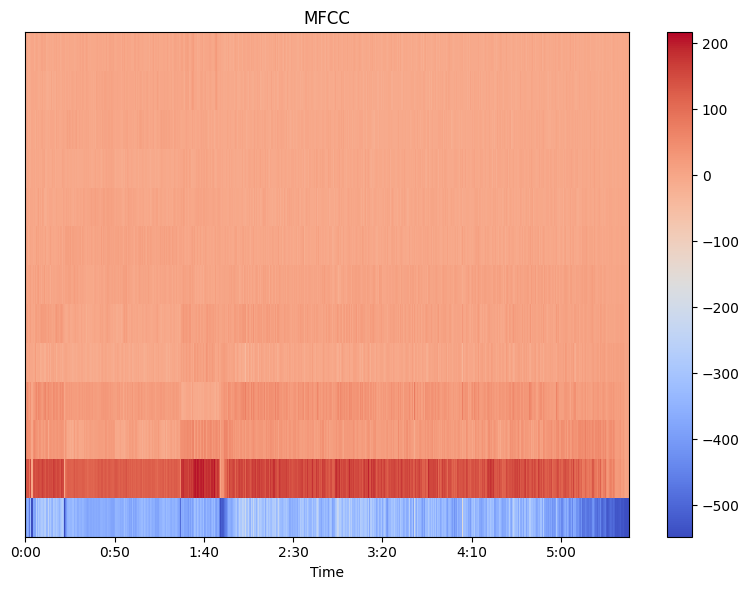

In [4]:
# create a mfcc and visualize 
import streamlit as st
import matplotlib.pyplot as plt

# Compute MFCC coefficients
n_mfcc = 13  # Number of desired IMFCC coefficients
mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=n_mfcc, hop_length=512)

# Display MFCCs as an image
plt.figure(figsize=(8, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

# Convert time frames to time in seconds
#time_in_seconds = librosa.times_like(mfccs.shape[1], sr=sampling_rate)
# Set custom x-axis ticks
#plt.xticks(np.arange(0, time_in_seconds[-1], 100))

plt.tight_layout()
plt.show()

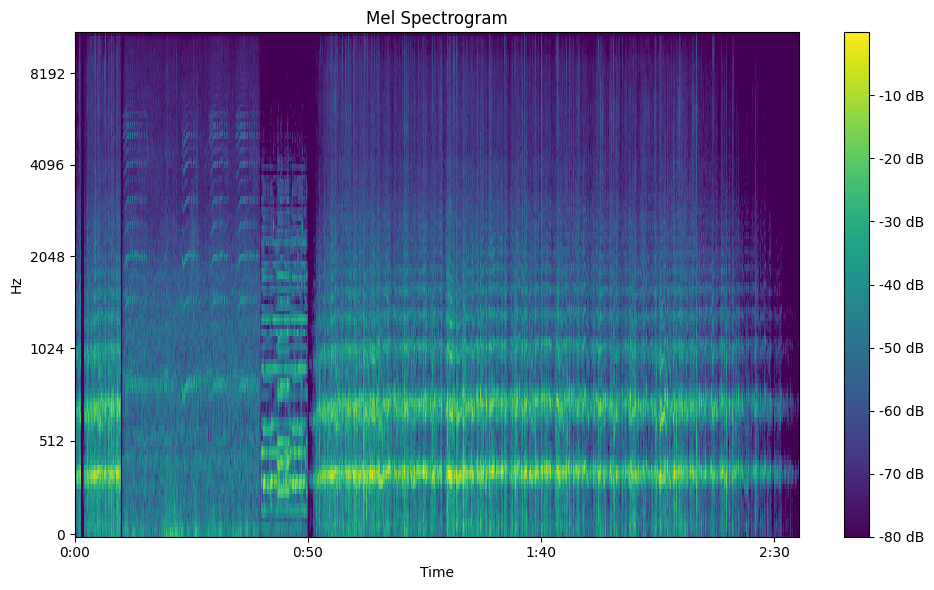

In [5]:

# create a Mel spectrogram and visualize 
# Load an audio file
y, sr = librosa.load(audio_file)

# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sampling_rate)

# Convert to decibels (dB)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


In [6]:
from pydub import silence, AudioSegment
from pathlib import Path


!C:\\Python\\libs\\ffmpeg\\bin\\ffmpeg.exe -i beeAudioFile.mp3 -b:a 8k mp3_8K.mp3



^C


In [2]:
from pydub import silence, AudioSegment
from pathlib import Path


!C:\\Python\\libs\\ffmpeg\\bin\\ffmpeg.exe -i beeQueenSound.wav -b:a 8k beeQueenSound_mp3_8K.mp3

ffmpeg version 2023-10-23-git-ff5a3575fe-essentials_build-www.gyan.dev Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.2.0 (Rev10, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --pkg-config=pkgconf --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-dxva2 --enable-d3d11va --enable-libvpl --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-li

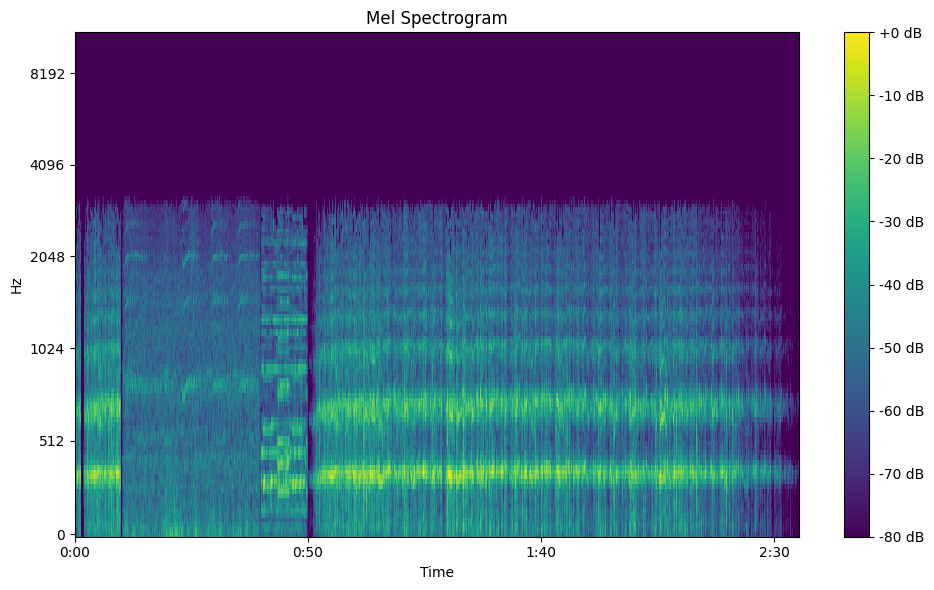

In [ ]:
# create a Mel spectrogram and visualize 
# Load an audio file
y, sr = librosa.load("output_compressed_audio.mp3")

# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sampling_rate)

# Convert to decibels (dB)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


In [ ]:
import librosa
import numpy as np

# Load the original and compressed audio
original_audio, _ = librosa.load("beeAudioFile.mp3", sr=None)
compressed_audio, _ = librosa.load("output_compressed_audio.mp3", sr=None)

# Calculate the power of the original audio
original_power = np.sum(original_audio ** 2)

# Calculate the power of the difference between original and compressed audio (noise)
noise_power = np.sum((original_audio - compressed_audio) ** 2)

# Calculate the SNR in decibels
snr = 10 * np.log10(original_power / noise_power)

print("Signal-to-Noise Ratio (SNR): {:.2f} dB".format(snr))

Signal-to-Noise Ratio (SNR): 21.32 dB


In [ ]:
# Calculate the Mean Squared Error (MSE)
mse = np.mean((original_audio - compressed_audio) ** 2)

print("Mean Squared Error (MSE): {:.2e}".format(mse))

Mean Squared Error (MSE): 2.51e-05


In [ ]:
import librosa
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the original audio
original_audio, _ = librosa.load("beeAudioFile.mp3", sr=None)

# Define the start and end times of the queen sound segment
queen_sound_start = 10  # Start time in seconds
queen_sound_end = 40    # End time in seconds

# Define the MFCC parameters
n_mfcc = 13  # Number of MFCC coefficients
n_fft = 2048  # Length of the FFT window
hop_length = 512  # Hop size for the FFT
segment_duration = 3  # Duration of each segment in seconds

# Function to extract MFCC features
def extract_mfcc(audio):
    mfccs = librosa.feature.mfcc(y=audio, sr=44100, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return mfccs.T

# Create empty lists to store the segments and their labels for the original audio
original_segments = []
original_labels = []

# Iterate over the original audio and segment it into 3-second segments
for i in range(0, len(original_audio) - segment_duration * 44100, segment_duration * 44100):
    segment = original_audio[i:i + segment_duration * 44100]
    mfcc = extract_mfcc(segment)
    
    # Assign labels based on the queen sound segment
    if i >= queen_sound_start * 44100 and i < queen_sound_end * 44100:
        label = 1
    else:
        label = 0

    original_segments.append(mfcc)
    original_labels.extend([label] * mfcc.shape[0])

# Combine the segments and labels for the original audio
X_original = np.vstack(original_segments)
y_original = np.array(original_labels)

# Split the data into training and testing sets for the original audio
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Train an SVM classifier for the original audio
svm_original_classifier = SVC(kernel='linear')
svm_original_classifier.fit(X_original_train, y_original_train)

# Make predictions on the test set for the original audio
y_original_pred = svm_original_classifier.predict(X_original_test)

# Calculate accuracy for the original audio
accuracy_original = accuracy_score(y_original_test, y_original_pred)
print("Accuracy for Original Audio:", accuracy_original)


Accuracy for Original Audio: 0.9986211651154774


In [ ]:
import librosa
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the original audio
original_audio, _ = librosa.load("output_compressed_audio.mp3", sr=None)

# Define the start and end times of the queen sound segment
queen_sound_start = 10  # Start time in seconds
queen_sound_end = 40    # End time in seconds

# Define the MFCC parameters
n_mfcc = 13  # Number of MFCC coefficients
n_fft = 2048  # Length of the FFT window
hop_length = 512  # Hop size for the FFT
segment_duration = 3  # Duration of each segment in seconds

# Function to extract MFCC features
def extract_mfcc(audio):
    mfccs = librosa.feature.mfcc(y=audio, sr=44100, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return mfccs.T

# Create empty lists to store the segments and their labels for the original audio
original_segments = []
original_labels = []

# Iterate over the original audio and segment it into 3-second segments
for i in range(0, len(original_audio) - segment_duration * 44100, segment_duration * 44100):
    segment = original_audio[i:i + segment_duration * 44100]
    mfcc = extract_mfcc(segment)
    
    # Assign labels based on the queen sound segment
    if i >= queen_sound_start * 44100 and i < queen_sound_end * 44100:
        label = 1
    else:
        label = 0

    original_segments.append(mfcc)
    original_labels.extend([label] * mfcc.shape[0])

# Combine the segments and labels for the original audio
X_original = np.vstack(original_segments)
y_original = np.array(original_labels)

# Split the data into training and testing sets for the original audio
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Train an SVM classifier for the original audio
svm_original_classifier = SVC(kernel='linear')
svm_original_classifier.fit(X_original_train, y_original_train)

# Make predictions on the test set for the original audio
y_original_pred = svm_original_classifier.predict(X_original_test)

# Calculate accuracy for the original audio
accuracy_original = accuracy_score(y_original_test, y_original_pred)
print("Accuracy for Original Audio:", accuracy_original)


Accuracy for Original Audio: 0.995174077904171


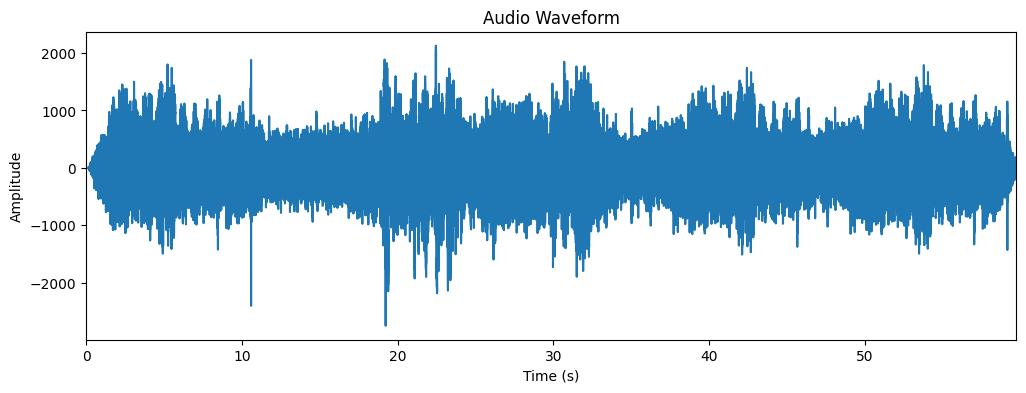

In [ ]:
import subprocess

# Function to convert MP3 to WAV using ffmpeg
def convert_mp3_to_wav(mp3_path, wav_path):
    subprocess.run(['ffmpeg', '-i', mp3_path, '-acodec', 'pcm_s16le', '-ar', '44100', wav_path])

# Usage example:
mp3_file_path = 'beeQueenSound.mp3'
wav_file_path = 'beeQueenSound.wav'
convert_mp3_to_wav(mp3_file_path, wav_file_path)

# Now, let's draw the waveform of the WAV file
import matplotlib.pyplot as plt
import numpy as np
import wave

# Function to plot waveform
def plot_waveform(wav_path):
    with wave.open(wav_path, 'r') as wav_file:
        # Extract Raw Audio from Wav File
        signal = wav_file.readframes(-1)
        signal = np.frombuffer(signal, dtype="int16")
        # Get the frame rate
        frate = wav_file.getframerate()
        # Calculate time for each sample
        time = np.linspace(0, len(signal) / frate, num=len(signal))
        # Plotting the waveform
        plt.figure(figsize=(12, 4))
        plt.plot(time, signal)
        plt.title('Audio Waveform')
        plt.ylabel('Amplitude')
        plt.xlabel('Time (s)')
        plt.xlim(left=time[0], right=time[-1])
        plt.show()

# After conversion, plot the waveform
plot_waveform(wav_file_path)


In [ ]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import wave

# Convert MP3 to WAV using ffmpeg
def convert_mp3_to_wav(mp3_file_path, wav_file_path):
    subprocess.run(['ffmpeg', '-i', mp3_file_path, wav_file_path])

# Plot the waveform of the audio file
def plot_audio_waveform(wav_file_path):
    with wave.open(wav_file_path, 'r') as wav_file:
        # Extract Raw Audio from Wav File
        signal = wav_file.readframes(-1)
        signal = np.frombuffer(signal, np.int16)

        # Get the number of frames
        frames = wav_file.getnframes()
        # Get the frame rate
        framerate = wav_file.getframerate()
        # Find the duration of the audio
        duration = frames / float(framerate)

        # Construct the time axis
        time = np.linspace(0., duration, frames)

        plt.figure(figsize=(15, 5))
        plt.plot(time, signal)
        plt.title('Waveform of Audio File')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.show()

# Example usage
mp3_file_path = 'queenSound.mp3'  # Replace with your MP3 file path
wav_file_path = 'queenSound.wav'  # Replace with your desired WAV file path

# Convert the MP3 file to WAV format
convert_mp3_to_wav(mp3_file_path, wav_file_path)

# Now plot the waveform
plot_audio_waveform(wav_file_path)


FileNotFoundError: [WinError 2] 系统找不到指定的文件。